# Data Scaling in Neural Network, Feature Scaling in ANN 

## Importing Necessary Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading and Preprocessing the Dataset

In [48]:
dataset_path = kagglehub.dataset_download('rakeshrau/social-network-ads')
csv_file_path = f'{dataset_path}/Social_Network_Ads.csv'
df = pd.read_csv(csv_file_path)

Using Colab cache for faster access to the 'social-network-ads' dataset.


In [49]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
df.drop(columns=['User ID', 'Gender'], inplace=True)

In [51]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [52]:
df.isna().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [53]:
df.duplicated().sum()

np.int64(33)

In [54]:
df.drop_duplicates(inplace=True)

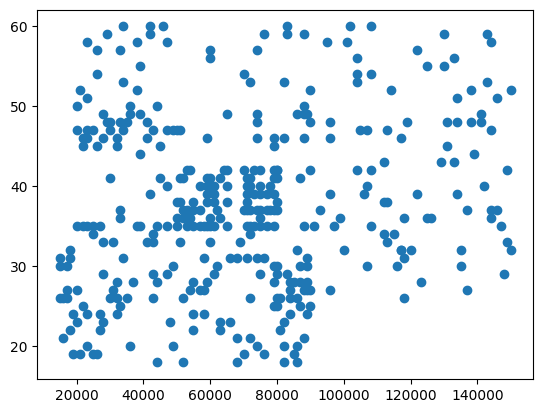

In [55]:
plt.scatter(df['EstimatedSalary'], df['Age'])
plt.show()

In [56]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [57]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [58]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Building, Training and Evaluation

### Model without Feature Scaling

In [60]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [63]:
history_1 = model.fit(
    X_train, y_train, epochs=100, validation_data=(X_test, y_test)
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6205 - loss: 4328.2520 - val_accuracy: 0.6216 - val_loss: 753.1777
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4914 - loss: 670.0180 - val_accuracy: 0.3784 - val_loss: 583.3479
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5155 - loss: 389.4370 - val_accuracy: 0.6216 - val_loss: 466.5512
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4771 - loss: 360.6408 - val_accuracy: 0.6216 - val_loss: 114.2449
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5836 - loss: 123.2348 - val_accuracy: 0.6216 - val_loss: 110.2648
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5903 - loss: 200.6881 - val_accuracy: 0.3784 - val_loss: 17.7407
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5079 - loss: 92.1522 - val_accuracy: 0.6216 - val_loss: 10.6012
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5167 - loss: 22.32

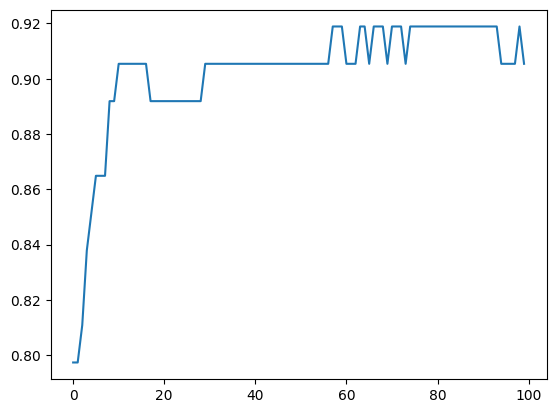

In [64]:
plt.plot(history.history['val_accuracy'])
plt.show()

### Model with Feature Scaling

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

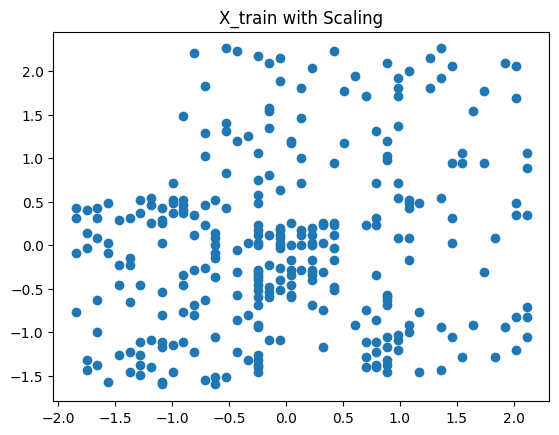

In [66]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.title("X_train with Scaling")
plt.show()

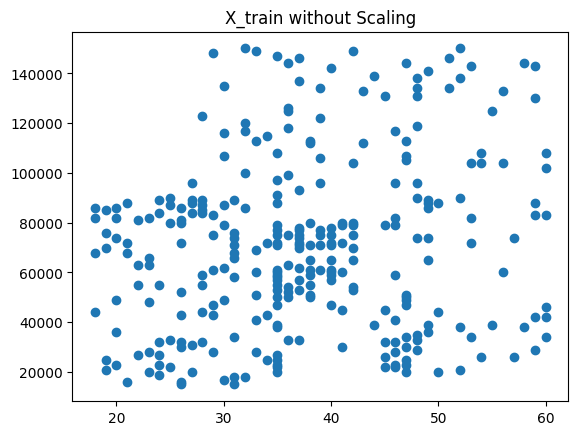

In [67]:
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title("X_train without Scaling")
plt.show()

In [68]:
X_train_scaled.max()

np.float64(2.2598556534733976)

In [69]:
X_train.max()

,0
Age,60
EstimatedSalary,150000


In [70]:
X_train_scaled.min()

np.float64(-1.8423951567320465)

In [71]:
X_train.min()

,0
Age,18
EstimatedSalary,15000


In [72]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [75]:
history_2 = model.fit(
    X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
    epochs=100
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6005 - loss: 0.6701 - val_accuracy: 0.7297 - val_loss: 0.6356
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7546 - loss: 0.6227 - val_accuracy: 0.7838 - val_loss: 0.5935
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8017 - loss: 0.5796 - val_accuracy: 0.7838 - val_loss: 0.5572
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8157 - loss: 0.5333 - val_accuracy: 0.7973 - val_loss: 0.5258
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8192 - loss: 0.5057 - val_accuracy: 0.8243 - val_loss: 0.4980
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8232 - loss: 0.4805 - val_accuracy: 0.8243 - val_loss: 0.4724
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8474 - loss: 0.4362 - val_accuracy: 0.8514 - val_loss: 0.4500
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8441 - loss: 0.4089 - val_accuracy: 0.8784 -

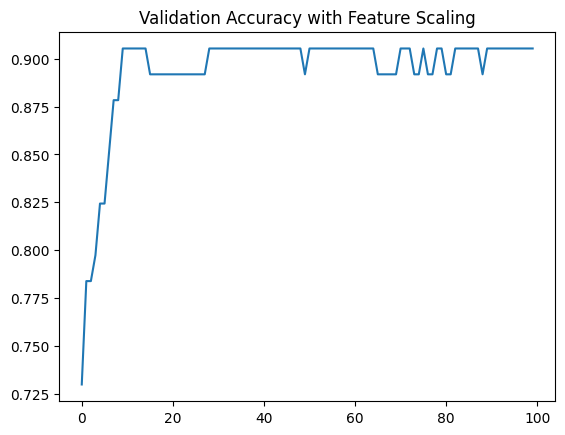

In [76]:
plt.plot(history_2.history['val_accuracy'])
plt.title('Validation Accuracy with Feature Scaling')
plt.show()

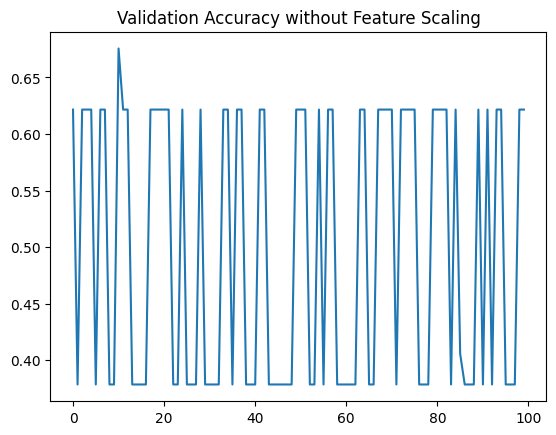

In [77]:
plt.plot(history_1.history['val_accuracy'])
plt.title('Validation Accuracy without Feature Scaling')
plt.show()